In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns


In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train_set= df_train.dropna()
df_train_set = df_train_set.reset_index()
df_train_set = df_train_set.drop(columns='index',axis=1)
df_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Exploratory data analysis

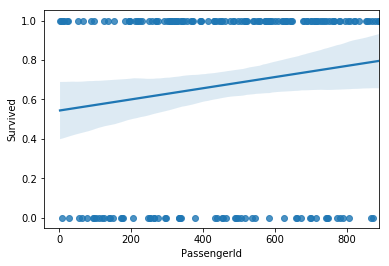

In [4]:
sns.regplot(x='PassengerId',y='Survived',data=df_train_set)

In [5]:
df_train_set[['PassengerId','Survived']].corr()

,PassengerId,Survived
PassengerId,1.000000,0.148495
Survived,0.148495,1.000000


#### __Relation between Survived column and Pclass__

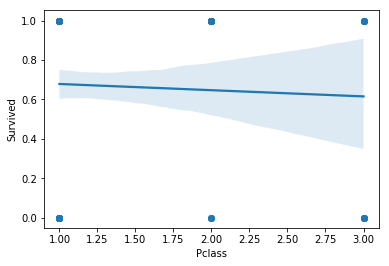

In [6]:
sns.regplot(x='Pclass',y='Survived',data=df_train_set)

In [7]:
df_train_set[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.034542
Survived,-0.034542,1.000000


In [8]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_train_set['Pclass'], df_train_set['Survived'])
print(pearson_coef,p_value)

-0.03454219168337028 0.6424938479886403


Based on the regression plot and the pearson correlation coefficient, Pclass is not a suitable predictor for Survived.

#### Relation between survived and Sibsp columns

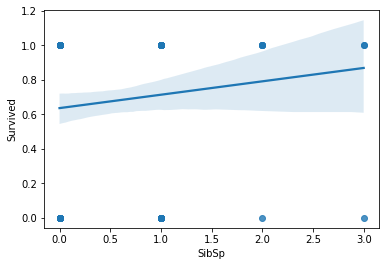

In [9]:
sns.regplot(x='SibSp',y='Survived',data=df_train_set)

In [10]:
df_train_set[['SibSp','Survived']].corr()

,SibSp,Survived
SibSp,1.000000,0.106346
Survived,0.106346,1.000000


In [11]:
pearson_coef,p_value = stats.pearsonr(df_train_set['SibSp'],df_train_set['Survived'])
print(pearson_coef,',',p_value)

0.10634622516806645 , 0.1519053311297903


#### Relation between Parch and Survived

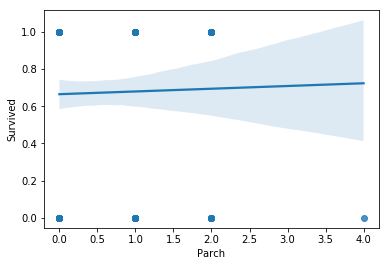

In [12]:
sns.regplot(x='Parch',y='Survived',data=df_train_set)

In [13]:
df_train_set[['Parch','Survived']].corr()

,Parch,Survived
Parch,1.000000,0.023582
Survived,0.023582,1.000000


In [14]:
pearson_coef,p_value=stats.pearsonr(df_train_set['Parch'],df_train_set['Survived'])
print(pearson_coef,',',p_value)

0.02358240802235772 , 0.7513384347829568


#### Relation between Fare and Survived

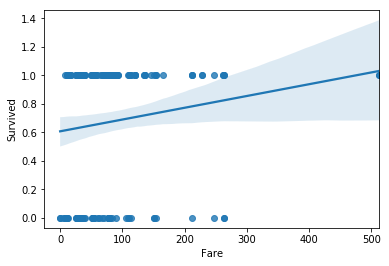

In [15]:
sns.regplot(x='Fare',y='Survived',data=df_train_set)

In [16]:
df_train_set[['Fare','Survived']].corr()

,Fare,Survived
Fare,1.000000,0.134241
Survived,0.134241,1.000000


In [17]:
pearson_coef,p_value=stats.pearsonr(df_train_set['Fare'],df_train_set['Survived'])
print(pearson_coef,',',p_value)

0.13424105283521096 , 0.07002557714938451


#### Relation between Age and Survived

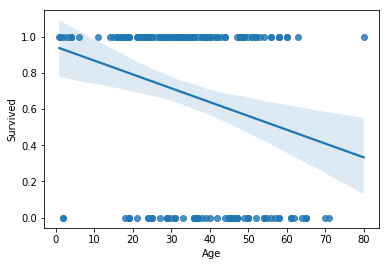

In [18]:
sns.regplot(x='Age',y='Survived',data=df_train_set)

In [19]:
df_train_set[['Age','Survived']].corr()

,Age,Survived
Age,1.000000,-0.254085
Survived,-0.254085,1.000000


#### Relation between Sex and survived

In [20]:
df_set = df_train_set[['Sex','Survived']]
df_set = df_set.reset_index()
df_set = df_set.groupby(['Sex'])
df_set.head()

,index,Sex,Survived
0,0,female,1
1,1,female,1
2,2,male,0
3,3,female,1
4,4,female,1
5,5,male,1
6,6,male,1
7,7,male,0
8,8,female,1
9,9,male,0


In [21]:
f_score,p_value = stats.f_oneway(df_set.get_group('female')['Survived'],df_set.get_group('male')['Survived'])
print(f_score,p_value)

71.60592300757907 8.693868321546973e-15


Based on the ANOVA results, Sex is a valid predictor for Survived.

#### Relation between Embarked and Survived

In [22]:
df_em = df_train_set[['Embarked','Survived']]
df_em = df_em.reset_index()
df_em= df_em.groupby(['Embarked'])
df_em.head()

,index,Embarked,Survived
0,0,C,1
1,1,S,1
2,2,S,0
3,3,S,1
4,4,S,1
5,5,S,1
8,8,C,1
9,9,C,0
15,15,C,0
16,16,C,1


In [23]:
f_score,p_value = stats.f_oneway(df_em.get_group('C')['Survived'],df_em.get_group('S')['Survived'],df_em.get_group('Q')['Survived'])
print(f_score,p_value)

1.0862244905197234 0.33968999726337


Based on the ANOVA results, Embarked is not a valid predictor for survived.

In [24]:
df = pd.get_dummies(df_train_set['Sex'])
df_train_set[['female','male']] = df[['female','male']]
df_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1,0
179,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,1
180,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,0
181,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0


## Model Development - Logistic Regression

In [42]:
from sklearn.tree import DecisionTreeClassifier
x = df_train_set[['female','male']]
y = df_train_set['Survived']
lr = DecisionTreeClassifier(criterion='entropy').fit(x,y)


lr


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Model Evaluation

In [43]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
df_test_set = df_test.drop(columns = ['Name','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Pclass'],axis=1)
df_test_set = df_test_set.reset_index()
df_test_set = df_test_set.drop(columns =['index'])
df_input = pd.get_dummies(df_test_set['Sex'])
df_test_set[['Female','Male']] = df_input[['female','male']]
df_test_set.head()

,PassengerId,Sex,Female,Male
0,892,male,0,1
1,893,female,1,0
2,894,male,0,1
3,895,male,0,1
4,896,female,1,0


In [45]:
xtest = df_test_set[['Female','Male']]
yhat = lr.predict(xtest)
yhat

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
df_test_set['Survived'] = yhat.astype(int)

In [47]:
df_final = df_test_set[['PassengerId','Survived']]

In [49]:
df_final.to_csv (r'Titanic_dataframe.csv', index = True, header=True)

In [48]:
df_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
